In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore') # ignore the warnings

pd.set_option('display.max_columns',None) # To see all the columns in dataset

## Data Analysis

### Descriptive Analysis 

In [23]:
# Load the dataset
data = pd.read_csv('housing+data.csv',na_values=['?'])
data.head()

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
0,1,7,2003,856,SBrkr,1710,2,Attchd,2,548,NaN,NaN,208500
1,2,6,1976,1262,SBrkr,1262,2,Attchd,2,460,NaN,NaN,181500
2,3,7,2001,920,SBrkr,1786,2,Attchd,2,608,NaN,NaN,223500
3,4,7,1915,756,SBrkr,1717,1,Detchd,3,642,NaN,NaN,140000
4,5,8,2000,1145,SBrkr,2198,2,Attchd,3,836,NaN,NaN,250000


In [3]:
# No. of rows and columns in dataset
print('No of rows:',data.shape[0],'\nNo of columns:',data.shape[1])

No of rows: 1418 
No of columns: 13


In [4]:
# Info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1418 entries, 0 to 1417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           1418 non-null   int64 
 1   OverallQual  1418 non-null   int64 
 2   YearBuilt    1418 non-null   int64 
 3   TotalBsmtSF  1418 non-null   int64 
 4   Electrical   1417 non-null   object
 5   GrLivArea    1418 non-null   int64 
 6   FullBath     1418 non-null   int64 
 7   GarageType   1275 non-null   object
 8   GarageCars   1418 non-null   int64 
 9   GarageArea   1418 non-null   int64 
 10  Fence        270 non-null    object
 11  MiscFeature  52 non-null     object
 12  SalePrice    1418 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 144.1+ KB


Inference: The info of the data shows that there are missing values in Electrical, Garage Type, Fence and Misc Features

In [5]:
# Five point summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1418.0,709.500000,409.485653,1.0,355.25,709.5,1063.75,1418.0
OverallQual,1418.0,6.114245,1.385858,1.0,5.00,6.0,7.00,10.0
YearBuilt,1418.0,1971.600846,30.064293,1872.0,1954.00,1973.0,2001.00,2010.0
TotalBsmtSF,1418.0,1061.712271,437.277589,0.0,796.50,994.0,1303.50,6110.0
GrLivArea,1418.0,1519.645275,527.412584,334.0,1132.50,1468.5,1786.00,5642.0
FullBath,1418.0,1.565585,0.551127,0.0,1.00,2.0,2.00,3.0
GarageCars,1418.0,1.763752,0.755995,0.0,1.00,2.0,2.00,4.0
GarageArea,1418.0,472.617772,216.068677,0.0,324.25,478.0,576.00,1418.0
SalePrice,1418.0,182089.485896,79970.934085,34900.0,130000.00,164800.0,215000.00,755000.0


The summary shows that there is chance of outliers in columns TotalBsmntSF, GrLivArea, GarageArea, SalePrice

In [6]:
data.describe(include='object').T

,count,unique,top,freq
Electrical,1417,5,SBrkr,1300
GarageType,1275,6,Attchd,800
Fence,270,4,MnPrv,148
MiscFeature,52,4,Shed,47


In [24]:
# Identify the numeric columns and category columns in the dataset
num_cols = ['YearBuilt','TotalBsmtSF','GrLivArea','GarageArea','SalePrice']
cat_cols = ['OverallQual','Electrical','FullBath','GarageType','GarageCars',
           'Fence','MiscFeature']

In [8]:
data.head(2)

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
0,1,7,2003,856,SBrkr,1710,2,Attchd,2,548,NaN,NaN,208500
1,2,6,1976,1262,SBrkr,1262,2,Attchd,2,460,NaN,NaN,181500


<Axes: >

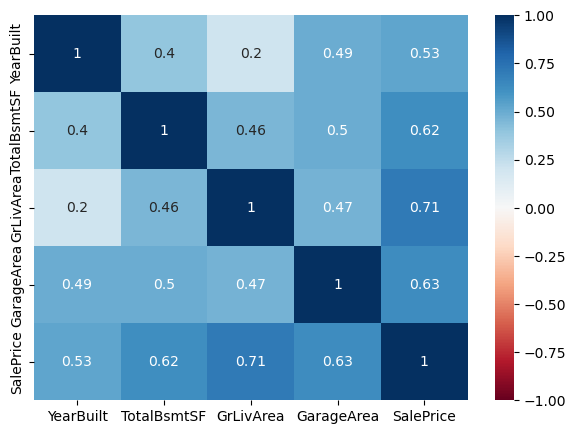

In [26]:
# Correlation plot
plt.figure(figsize=(7,5))
sns.heatmap(data[num_cols].corr(),vmax=1,vmin=-1,cmap='RdBu',annot=True)

In [ ]:
data.corr()['SalePrice'].sort_values(ascending=False)

In [27]:
# Lets remove id as it makes no sense in the data
del data['Id']

In [28]:
data.columns

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'Electrical', 'GrLivArea',
       'FullBath', 'GarageType', 'GarageCars', 'GarageArea', 'Fence',
       'MiscFeature', 'SalePrice'],
      dtype='object')

### Univariate Analysis on the data

In [ ]:
# Number Columns
plt.figure(figsize=(12,10))
t=1
for i in num_cols:
    plt.subplot(3,2,t)
    plt.title(f'{i}, Skewness: {round(data[i].skew(),2)}')
    sns.distplot(data[i])
    plt.axvline(data[i].mean(),color='r')
    plt.axvline(data[i].median(),color='g')
    t+=1
plt.tight_layout()
plt.show()

In [ ]:
# Category columns
plt.figure(figsize=(12,10))
t = 1
for i in cat_cols:
    plt.subplot(4,2,t)
    sns.countplot(data = data,x=i)
    t+=1
plt.tight_layout()
plt.show()

### Bivaraite Analysis

In [ ]:
# Number Vs Number
plt.figure(figsize=(12,10))
t=1
for i in num_cols:
    if i != 'SalePrice':
        plt.subplot(2,2,t)
        sns.regplot(x=data['SalePrice'],y=data[i],ci=0,line_kws={'color':'red'})
        t+=1
plt.tight_layout()
plt.show()
        

In [ ]:
# Number Vs Category
plt.figure(figsize=(13,15))
t = 1
for i in cat_cols:
    plt.subplot(4,2,t)
    sns.boxplot(data=data,x=i,y='SalePrice')
    t+=1
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(13,15))
t = 1
for i in cat_cols:
    plt.subplot(4,2,t)
    data.groupby(by=i)['SalePrice'].mean().plot(kind='bar')
    t+=1
plt.tight_layout()
plt.show()

### Satistical Analysis

#### Key Inferences
* YearBuilt, GrLivArea, TotalBsmtSF and GarageArea are related to the slae price
* BuiltQual, Electrical, FullBath, GarageType and GarageCars are affecting the SalePrice 

In [ ]:
# Lets explore yearbuilt and Saleprice statistically

In [ ]:
# Assumptions : Data must be normal

# Ho: The data is normal
# Ha: The data is not normal


print(stats.shapiro(data['SalePrice']))
print(stats.shapiro(data['YearBuilt']))

# Since both pvalues are less than 0.05 we have to reject Ho. SO we can go with spearman's correlation
# test (non parametric)

In [ ]:
# Spearman's correlation test
# Ho: Samples are independent
# Ha: Samples are dependent

print(stats.spearmanr(data['SalePrice'],data['YearBuilt']))

In [ ]:
for i in num_cols:
    if i != 'SalePrice':
        print(stats.spearmanr(data['SalePrice'],data[i]))

In [ ]:
# Lets proove statistically the affect of garagetype on Saleprice

In [ ]:
data['GarageType'].unique()

In [ ]:
# Kruskal Walli's Test
# Ho: mu1=mu2=...mu6
# Ha: atleast one mean is different

s1 = data[data['GarageType']=='Attchd']['SalePrice']
s2 = data[data['GarageType']=='Detchd']['SalePrice']
s3 = data[data['GarageType']=='BuiltIn']['SalePrice']
s4 = data[data['GarageType']=='CarPort']['SalePrice']
s5 = data[data['GarageType']=='Basment']['SalePrice']
s6 = data[data['GarageType']=='2Types']['SalePrice']

print(stats.kruskal(s1,s2,s3,s4,s5,s6))

## Data Preprocessing

### Feature Engineering

In [29]:
# We will create  a new column age by assuming the tha data was collected
# in 2010. We will subtract 2010 and yearbuilt.

data['Age'] = 2010 - data['YearBuilt']

data.drop(columns=['YearBuilt'],inplace=True)
data.head(2)

,OverallQual,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age
0,7,856,SBrkr,1710,2,Attchd,2,548,NaN,NaN,208500,7
1,6,1262,SBrkr,1262,2,Attchd,2,460,NaN,NaN,181500,34


<Axes: xlabel='SalePrice', ylabel='Age'>

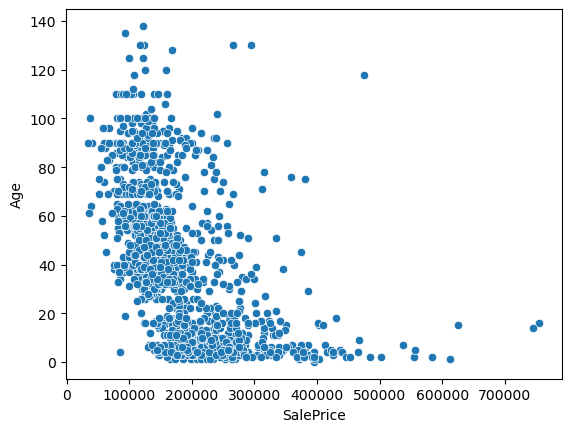

In [30]:
sns.scatterplot(x=data['SalePrice'],y=data['Age'])

In [31]:
data[['SalePrice','Age']].corr()

,SalePrice,Age
SalePrice,1.000000,-0.528006
Age,-0.528006,1.000000


### Missing Values

In [32]:
missing_pec = ((data.isnull().sum()/data.shape[0])*100).sort_values(ascending=False)

In [33]:
missing_pec[missing_pec>0]

MiscFeature    96.332863
Fence          80.959097
GarageType     10.084626
Electrical      0.070522
dtype: float64

In [ ]:
# Missing value Value

# Closest fit
# Central Value imputation
# Deletion (Lot of data is missing in a column or very few rows in the data
# has missing columns)

In [34]:
# Lets treat the missing value in Electrical

data[data['Electrical'].isnull()]

,OverallQual,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age
1339,5,384,NaN,1394,2,BuiltIn,2,400,NaN,NaN,167500,4


In [35]:
# Central value imputation
data['Electrical'].fillna(data['Electrical'].mode()[0],inplace=True)

In [36]:
data[data['Electrical'].isnull()]

,OverallQual,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age


In [ ]:
data.groupby(by='GarageCars')['GarageType'].describe(include=object)

In [37]:
# Lets treat missing values in GarageType
data[data['GarageType'].isnull()]

,OverallQual,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age
8,5,991,SBrkr,1077,1,NaN,1,205,NaN,NaN,118000,71
22,5,1060,SBrkr,1060,1,NaN,1,270,MnPrv,NaN,154000,42
26,5,1484,SBrkr,1600,1,NaN,1,319,NaN,NaN,207500,53
37,4,0,FuseP,1152,2,NaN,0,0,NaN,NaN,82000,55
39,5,1350,SBrkr,1328,1,NaN,1,308,NaN,NaN,170000,51
...,...,...,...,...,...,...,...,...,...,...,...,...
1387,5,788,SBrkr,804,1,NaN,1,240,MnPrv,NaN,119000,70
1407,5,630,SBrkr,630,1,NaN,0,0,NaN,NaN,92000,40
1408,5,896,SBrkr,1792,2,NaN,0,0,NaN,NaN,136000,36
1411,5,1140,SBrkr,1140,1,NaN,0,0,NaN,NaN,84500,4


In [38]:
# Lets impute the missing values where garage area and garage cars are 0
# with new category 'NoGarage'

data['GarageType'] = np.where((data['GarageArea']==0)&(data['GarageCars']==0),
                             'NoGarage',
                             data['GarageType'])

In [39]:
data[data['GarageType'].isnull()]['GarageCars'].value_counts()

GarageCars
1    62
Name: count, dtype: int64

In [40]:
# Since mode of GarageType where garageCars is 1 is 'Detchd'
data['GarageType'].fillna('Detchd',inplace=True)

In [41]:
data[data['GarageType'].isnull()]

,OverallQual,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age


In [42]:
data.GarageType.value_counts()

GarageType
Attchd      800
Detchd      416
BuiltIn      87
NoGarage     81
Basment      19
CarPort       9
2Types        6
Name: count, dtype: int64

In [43]:
# Lets treat missing values in Fence
data['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [44]:
# Lets bin this data into 0-Fence not present, 1-Fence present

data['Fence'] = np.where(data['Fence'].isnull(),0,1)

In [45]:
data['Fence'].value_counts()

Fence
0    1148
1     270
Name: count, dtype: int64

In [46]:
# Lets validate this statically
# Ho: The samples are independent
# Ha: The samples are dependent

stats.mannwhitneyu(data[data['Fence']==0]['SalePrice'],
                  data[data['Fence']==1]['SalePrice'])

MannwhitneyuResult(statistic=201362.0, pvalue=1.842459050609252e-14)

<Axes: xlabel='Fence', ylabel='SalePrice'>

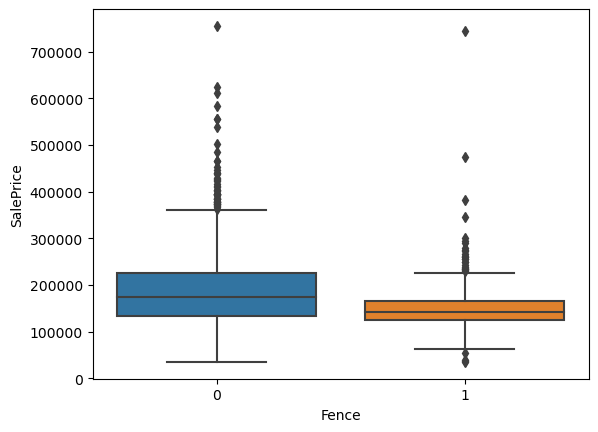

In [47]:
sns.boxplot(x=data['Fence'],y=data['SalePrice'])

In [48]:
# Lets treat missing values in MiscFeature
data['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [49]:
# Lets assume Nan's here means no Misc Feature
# 1 - MiscFeature Yes
# 0 - MiscFeature No
data['MiscFeature'] = np.where(data['MiscFeature'].isnull(),0,1)
data['MiscFeature'].value_counts()

MiscFeature
0    1366
1      52
Name: count, dtype: int64

In [50]:
# Lets validate this statically
# Ho: The samples are independent
# Ha: The samples are dependent

stats.mannwhitneyu(data[data['MiscFeature']==0]['SalePrice'],
                  data[data['MiscFeature']==1]['SalePrice'])

MannwhitneyuResult(statistic=42639.5, pvalue=0.013980740442174016)

<Axes: xlabel='MiscFeature'>

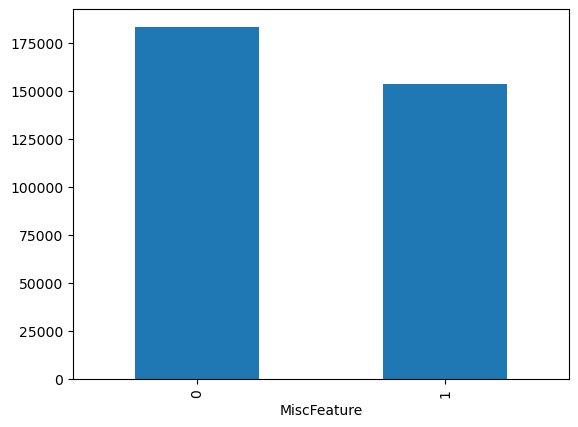

In [51]:
data.groupby(by='MiscFeature')['SalePrice'].mean().plot(kind='bar')

In [52]:
data.isnull().sum()

OverallQual    0
TotalBsmtSF    0
Electrical     0
GrLivArea      0
FullBath       0
GarageType     0
GarageCars     0
GarageArea     0
Fence          0
MiscFeature    0
SalePrice      0
Age            0
dtype: int64

### Outlier Treatment

In [ ]:
plt.figure(figsize=(12,10))
t=1
for i in ['Age','GrLivArea','TotalBsmtSF','GarageArea','SalePrice']:
    plt.subplot(3,2,t)
    plt.title(f'{i}, Skewness: {round(data[i].skew(),2)}')
    sns.boxplot(x=data[i],orient='h')
    t+=1
plt.tight_layout()
plt.show()

In [53]:
data[data['TotalBsmtSF']>6000]

,OverallQual,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age
1260,10,6110,SBrkr,5642,2,Attchd,2,1418,0,0,160000,2


In [54]:
data[data['GrLivArea']>5000]

,OverallQual,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age
1260,10,6110,SBrkr,5642,2,Attchd,2,1418,0,0,160000,2


In [55]:
data[data['SalePrice']>700000]

,OverallQual,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age
665,10,2444,SBrkr,4316,3,Attchd,3,832,0,0,755000,16
1147,10,2396,SBrkr,4476,3,Attchd,3,813,1,0,745000,14


In [56]:
data.drop(index=[1260],inplace=True)

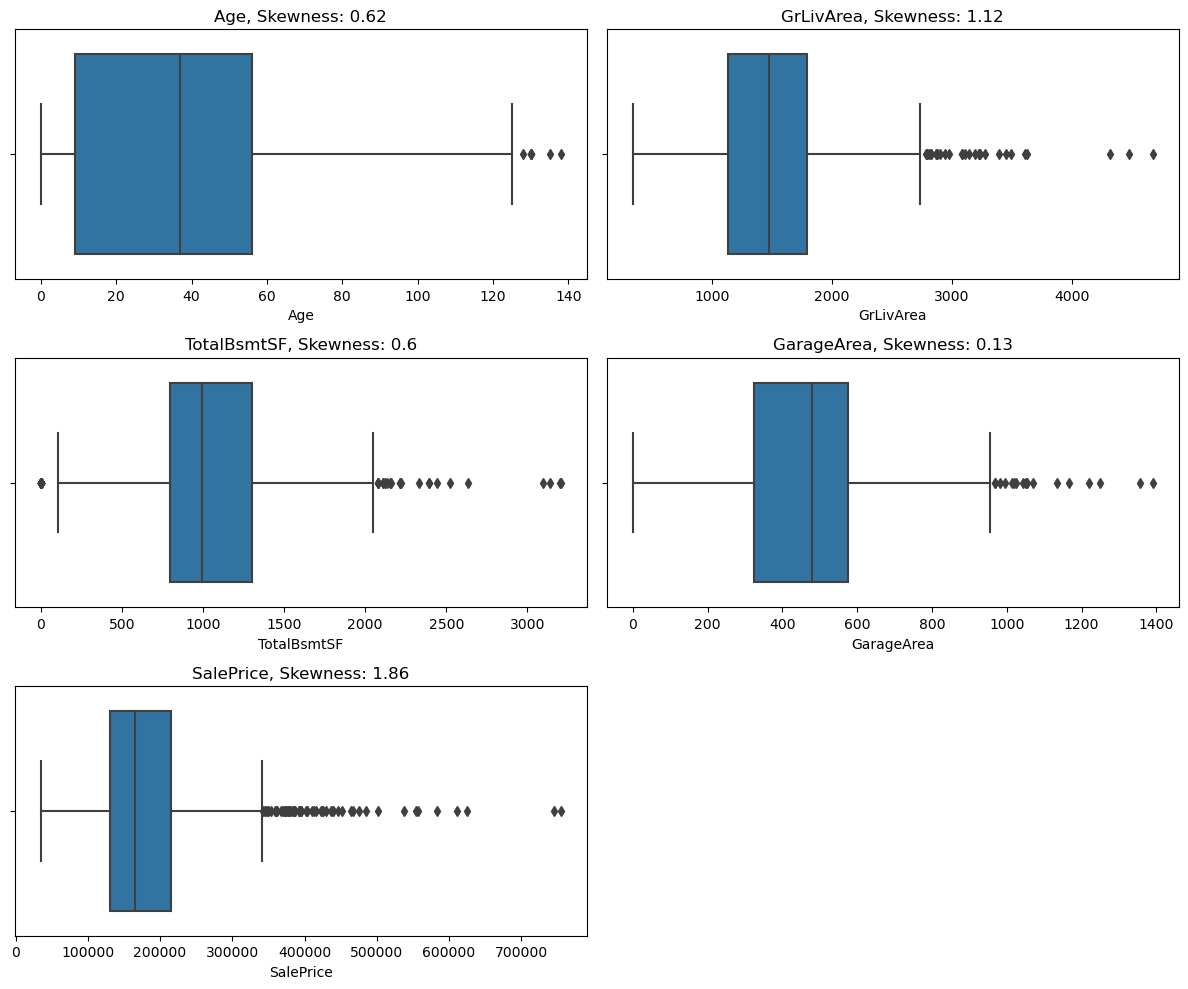

In [57]:
plt.figure(figsize=(12,10))
t=1
for i in ['Age','GrLivArea','TotalBsmtSF','GarageArea','SalePrice']:
    plt.subplot(3,2,t)
    plt.title(f'{i}, Skewness: {round(data[i].skew(),2)}')
    sns.boxplot(x=data[i],orient='h')
    t+=1
plt.tight_layout()
plt.show()

In [ ]:
# Cap the outliers
# Remove the outliers

In [58]:
# Lets cap the outliers to 99th percentile in GarageArea,
# TotalbsmtSF, GrLivArea

for i in ['GarageArea','TotalBsmtSF','GrLivArea']:
    ul = np.percentile(data[i],99)
    data[i] = np.where(data[i]>ul,ul,data[i])

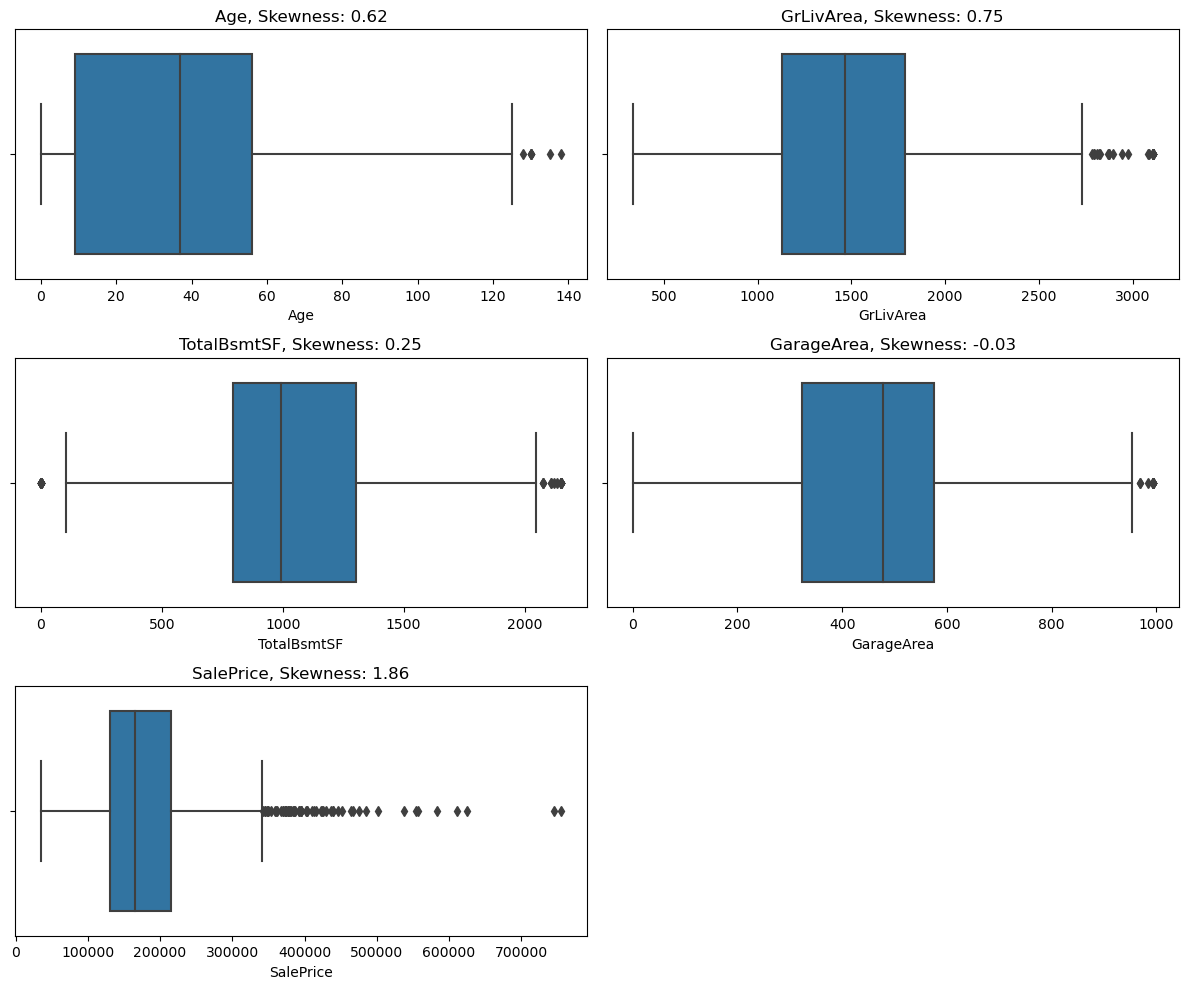

In [59]:
plt.figure(figsize=(12,10))
t=1
for i in ['Age','GrLivArea','TotalBsmtSF','GarageArea','SalePrice']:
    plt.subplot(3,2,t)
    plt.title(f'{i}, Skewness: {round(data[i].skew(),2)}')
    sns.boxplot(x=data[i],orient='h')
    t+=1
plt.tight_layout()
plt.show()

### Encoding

In [60]:
data.head(2)

,OverallQual,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age
0,7,856.0,SBrkr,1710.0,2,Attchd,2,548.0,0,0,208500,7
1,6,1262.0,SBrkr,1262.0,2,Attchd,2,460.0,0,0,181500,34


In [61]:
data['Electrical'].value_counts()

Electrical
SBrkr    1300
FuseA      89
FuseF      24
FuseP       3
Mix         1
Name: count, dtype: int64

In [62]:
data['Electrical'] = np.where(data['Electrical']=='SBrkr',1,0)
data.head()

,OverallQual,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age
0,7,856.0,1,1710.0,2,Attchd,2,548.0,0,0,208500,7
1,6,1262.0,1,1262.0,2,Attchd,2,460.0,0,0,181500,34
2,7,920.0,1,1786.0,2,Attchd,2,608.0,0,0,223500,9
3,7,756.0,1,1717.0,1,Detchd,3,642.0,0,0,140000,95
4,8,1145.0,1,2198.0,2,Attchd,3,836.0,0,0,250000,10


In [63]:
data['GarageType'].value_counts()

GarageType
Attchd      799
Detchd      416
BuiltIn      87
NoGarage     81
Basment      19
CarPort       9
2Types        6
Name: count, dtype: int64

In [64]:
def garagetype(s):
    if s in ['Basment','CarPort','2Types']:
        return 'Others'
    else:
        return s

In [65]:
data['GarageType'] = data['GarageType'].apply(garagetype)

In [66]:
data['GarageType'].value_counts()

GarageType
Attchd      799
Detchd      416
BuiltIn      87
NoGarage     81
Others       34
Name: count, dtype: int64

In [67]:
dicti = round(data.groupby(by='GarageType')['SalePrice'].mean(),0).to_dict()

In [68]:
dicti

{'Attchd': 208760.0,
 'BuiltIn': 255680.0,
 'Detchd': 133853.0,
 'NoGarage': 103317.0,
 'Others': 145535.0}

In [69]:
data['GarageType'] = data['GarageType'].map(dicti)

In [70]:
data.head(2)

,OverallQual,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age
0,7,856.0,1,1710.0,2,208760.0,2,548.0,0,0,208500,7
1,6,1262.0,1,1262.0,2,208760.0,2,460.0,0,0,181500,34


<Axes: xlabel='GarageType', ylabel='SalePrice'>

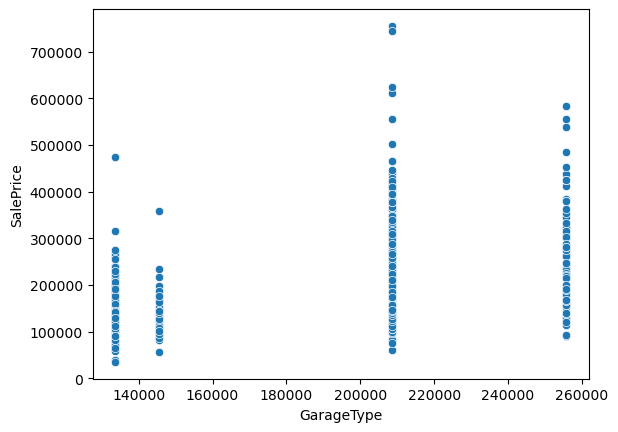

In [20]:
sns.scatterplot(y=data['SalePrice'],x=data['GarageType'])

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1417 entries, 0 to 1417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   OverallQual  1417 non-null   int64  
 1   TotalBsmtSF  1417 non-null   float64
 2   Electrical   1417 non-null   int32  
 3   GrLivArea    1417 non-null   float64
 4   FullBath     1417 non-null   int64  
 5   GarageType   1417 non-null   float64
 6   GarageCars   1417 non-null   int64  
 7   GarageArea   1417 non-null   float64
 8   Fence        1417 non-null   int32  
 9   MiscFeature  1417 non-null   int32  
 10  SalePrice    1417 non-null   int64  
 11  Age          1417 non-null   int64  
dtypes: float64(4), int32(3), int64(5)
memory usage: 127.3 KB


## Predictive Modeling

In [72]:
# ml libray

import statsmodels.api as sma
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error

In [73]:
x=data.drop(columns=['SalePrice'])
y=data['SalePrice']

model=sma.OLS(y,sma.add_constant(x)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     496.8
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        11:30:42   Log-Likelihood:                -16883.
No. Observations:                1417   AIC:                         3.379e+04
Df Residuals:                    1405   BIC:                         3.385e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6.956e+04   9069.211     -7.670      0.000   -8.74e+04   -5.18e+04
OverallQual  1.914e+04   1131.969     16.905      0.000    1.69e+04    2.14e+04
TotalBsmtSF    43.5213      3.020     14.412      0.000      37.597      49.445
Electrical   -646.1681   3775.960     -0.171      0.864   -8053.295    6760.959
GrLivArea      61.6409      3.102     19.869      0.000      55.555      67.727
FullBath    -7090.0980   2591.573     -2.736      0.006   -1.22e+04   -2006.328
GarageType     -0.0096      0.032     -0.299      0.765      -0.072       0.053
GarageCars   3126.8807   3104.349      1.007      0.314   -2962.778    9216.539
GarageArea     35.7175     10.540      3.389      0.001      15.042      56.393
Fence        -294.0269   2577.194     -0.114      0.909   -5349.589    4761.535
MiscFeature  1875.8482   5199.350      0.361      0.718   -8323.477    1.21e+04
Age          -344.6824     52.039     -6.624      0.000    -446.764    -242.601
==============================================================================
Omnibus:                      708.475   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15583.410
Skew:                           1.824   Prob(JB):                         0.00
Kurtosis:                      18.831   Cond. No.                     1.79e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
# lets split the dataset

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=.75,random_state=1)

In [75]:
def model_scores(trainx, trainy, testx, testy, model):
    m=model
    m.fit(trainx, trainy)
    pred=m.predict(testx)
    print('R-Squares', r2_score(testy, pred))
    print('MSE: ', mean_squared_error(testy, pred))
    print('RMSE: ', np.sqrt(mean_squared_error(testy, pred)))
    print('MAPE: ', mean_absolute_percentage_error(testy, pred))

In [76]:
# Test Data
model_scores(x_train, y_train, x_test, y_test, LinearRegression())

R-Squares 0.7953925371660249
MSE:  1271149362.717411
RMSE:  35653.18166331598
MAPE:  0.15279547155710557


In [77]:
# Train Data
model_scores(x_train, y_train, x_train, y_train, LinearRegression())

R-Squares 0.7949981200501836
MSE:  1323096576.5795012
RMSE:  36374.39451839028
MAPE:  0.14530156517074905


In [78]:
# Since Test Data and Train data scores is nearly the same, hence we can say that the model has very less bias.

In [83]:
# Changing the train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=.75,random_state=200)

In [84]:
def model_scores(trainx, trainy, testx, testy, model):
    m=model
    m.fit(trainx, trainy)
    pred=m.predict(testx)
    print('R-Squares', r2_score(testy, pred))
    print('MSE: ', mean_squared_error(testy, pred))
    print('RMSE: ', np.sqrt(mean_squared_error(testy, pred)))
    print('MAPE: ', mean_absolute_percentage_error(testy, pred))

In [85]:
# Test Data
model_scores(x_train, y_train, x_test, y_test, LinearRegression())

R-Squares 0.7544717654538935
MSE:  1937660200.141271
RMSE:  44018.861867854685
MAPE:  0.14970916658240074


In [86]:
# Train Data
model_scores(x_train, y_train, x_train, y_train, LinearRegression())

R-Squares 0.8131636723516543
MSE:  1101019056.7597592
RMSE:  33181.6072057964
MAPE:  0.14340635927391399


In [87]:
# I can see there is a variation in scores of Train and Test

# Cross Validation

## K-Fold Cross Validation

In [88]:
from sklearn.model_selection import KFold, cross_val_score, LeaveOneOut

In [89]:
kfold=KFold(n_splits=3)

In [94]:
f1, f2, f3=kfold.split(x, y) #we got 3 folds

In [98]:
f1 # It contains Fold 2 and Fold 2

(array([ 473,  474,  475,  476,  477,  478,  479,  480,  481,  482,  483,
         484,  485,  486,  487,  488,  489,  490,  491,  492,  493,  494,
         495,  496,  497,  498,  499,  500,  501,  502,  503,  504,  505,
         506,  507,  508,  509,  510,  511,  512,  513,  514,  515,  516,
         517,  518,  519,  520,  521,  522,  523,  524,  525,  526,  527,
         528,  529,  530,  531,  532,  533,  534,  535,  536,  537,  538,
         539,  540,  541,  542,  543,  544,  545,  546,  547,  548,  549,
         550,  551,  552,  553,  554,  555,  556,  557,  558,  559,  560,
         561,  562,  563,  564,  565,  566,  567,  568,  569,  570,  571,
         572,  573,  574,  575,  576,  577,  578,  579,  580,  581,  582,
         583,  584,  585,  586,  587,  588,  589,  590,  591,  592,  593,
         594,  595,  596,  597,  598,  599,  600,  601,  602,  603,  604,
         605,  606,  607,  608,  609,  610,  611,  612,  613,  614,  615,
         616,  617,  618,  619,  620, 

In [100]:
cross_val=cross_val_score(estimator=LinearRegression(), X=x, y=y, cv=3, scoring='r2', verbose=3)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.831) total time=   0.3s
[CV] END ................................ score: (test=0.763) total time=   0.0s
[CV] END ................................ score: (test=0.784) total time=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s finished


In [101]:
cross_val=cross_val_score(estimator=LinearRegression(), X=x, y=y, cv=5, scoring='r2', verbose=3)

[CV] END ................................ score: (test=0.819) total time=   0.0s
[CV] END ................................ score: (test=0.819) total time=   0.0s
[CV] END ................................ score: (test=0.769) total time=   0.0s
[CV] END ................................ score: (test=0.774) total time=   0.0s
[CV] END ................................ score: (test=0.773) total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [102]:
cross_val

array([0.81895205, 0.81876611, 0.76872445, 0.77359253, 0.77327046])

In [108]:
print('R2 OF MODEL: ', np.mean(cross_val))
print('With Variation', (np.std(cross_val)/np.mean(cross_val))*100)

R2 OF MODEL:  0.7906611210907504
With Variation 2.9200755986486127


Inference: The R-square or the score of a model can be considered to be 0.79 with 3% of variation, this shows that model is a generalized model with less variance.

### LOOCV Leave One Out Cross Validation

In [110]:
loocv=cross_val_score(estimator=LinearRegression(), X=x, y=y, cv=LeaveOneOut(), scoring='neg_mean_squared_error',
                     verbose=3)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] END ........................ score: (test=-26547445.424) total time=   0.0s
[CV] END ........................ score: (test=-88956413.665) total time=   0.0s
[CV] END .......................... score: (test=-884840.775) total time=   0.0s
[CV] END ...................... score: (test=-2982143905.983) total time=   0.0s
[CV] END ...................... score: (test=-1442316531.957) total time=   0.0s
[CV] END ....................... score: (test=-129811431.565) total time=   0.0s
[CV] END ...................... score: (test=-1278278114.959) total time=   0.0s
[CV] END ...................... score: (test=-1448688528.279) total time=   0.0s
[CV] END ........................ score: (test=-29459693.353) total time=   0.0s
[CV] END ......................... score: (test=-2912245.504) total time=   0.0s
[CV] END ...................... score: (test=-1494949398.488) total time=   0.0s
[CV] END ...................... score: (test=-1020639454.227) total time=   0.0s
[CV] END ...................

[CV] END ....................... score: (test=-990869491.648) total time=   0.0s
[CV] END ....................... score: (test=-175220922.911) total time=   0.0s
[CV] END ........................ score: (test=-87149443.020) total time=   0.0s
[CV] END ....................... score: (test=-400320576.415) total time=   0.0s
[CV] END ....................... score: (test=-244131099.499) total time=   0.0s
[CV] END ........................ score: (test=-22702387.850) total time=   0.0s
[CV] END ....................... score: (test=-280737207.407) total time=   0.0s
[CV] END ....................... score: (test=-264945648.469) total time=   0.0s
[CV] END .......................... score: (test=-159862.055) total time=   0.0s
[CV] END ........................ score: (test=-79862966.704) total time=   0.0s
[CV] END ......................... score: (test=-8668494.593) total time=   0.0s
[CV] END ....................... score: (test=-883239198.163) total time=   0.0s
[CV] END ...................

[CV] END ...................... score: (test=-1320553588.109) total time=   0.0s
[CV] END ......................... score: (test=-1550977.165) total time=   0.0s
[CV] END ...................... score: (test=-1056336371.807) total time=   0.0s
[CV] END ....................... score: (test=-817226535.641) total time=   0.0s
[CV] END ....................... score: (test=-470567215.303) total time=   0.0s
[CV] END ....................... score: (test=-977608789.738) total time=   0.0s
[CV] END ....................... score: (test=-488057973.215) total time=   0.0s
[CV] END ...................... score: (test=-1685334784.631) total time=   0.0s
[CV] END ...................... score: (test=-1854208793.977) total time=   0.0s
[CV] END ....................... score: (test=-824569401.040) total time=   0.0s
[CV] END ...................... score: (test=-2576375491.088) total time=   0.0s
[CV] END ........................ score: (test=-63407652.207) total time=   0.0s
[CV] END ...................

[CV] END ...................... score: (test=-2775097190.303) total time=   0.0s
[CV] END ....................... score: (test=-472395797.986) total time=   0.0s
[CV] END ....................... score: (test=-719490059.736) total time=   0.0s
[CV] END ....................... score: (test=-648110194.343) total time=   0.0s
[CV] END ....................... score: (test=-293632891.970) total time=   0.0s
[CV] END ...................... score: (test=-1175068136.377) total time=   0.0s
[CV] END ...................... score: (test=-2265967907.168) total time=   0.0s
[CV] END ...................... score: (test=-4971852463.899) total time=   0.0s
[CV] END ........................ score: (test=-71829250.237) total time=   0.0s
[CV] END ....................... score: (test=-991462505.721) total time=   0.0s
[CV] END ........................ score: (test=-15159960.424) total time=   0.0s
[CV] END ......................... score: (test=-8288555.131) total time=   0.0s
[CV] END ...................

[CV] END ......................... score: (test=-6032150.763) total time=   0.0s
[CV] END ...................... score: (test=-3211430271.453) total time=   0.0s
[CV] END ....................... score: (test=-167002670.897) total time=   0.0s
[CV] END ....................... score: (test=-323102431.189) total time=   0.0s
[CV] END ....................... score: (test=-340217887.483) total time=   0.0s
[CV] END ....................... score: (test=-493573740.940) total time=   0.0s
[CV] END ....................... score: (test=-619218031.656) total time=   0.0s
[CV] END ...................... score: (test=-8452888500.754) total time=   0.0s
[CV] END ....................... score: (test=-568833231.151) total time=   0.0s
[CV] END ........................ score: (test=-51173981.274) total time=   0.0s
[CV] END ....................... score: (test=-261598467.050) total time=   0.0s
[CV] END ........................ score: (test=-18670552.999) total time=   0.0s
[CV] END ...................

[CV] END .......................... score: (test=-885976.824) total time=   0.0s
[CV] END ...................... score: (test=-1548476817.849) total time=   0.0s
[CV] END ........................ score: (test=-10162181.079) total time=   0.0s
[CV] END ....................... score: (test=-210728364.794) total time=   0.0s
[CV] END ........................ score: (test=-23831320.270) total time=   0.0s
[CV] END ...................... score: (test=-1842411733.223) total time=   0.0s
[CV] END ...................... score: (test=-1044246017.576) total time=   0.0s
[CV] END .......................... score: (test=-893160.904) total time=   0.0s
[CV] END ...................... score: (test=-5317207496.334) total time=   0.0s
[CV] END ......................... score: (test=-9553944.963) total time=   0.0s
[CV] END ....................... score: (test=-191446351.305) total time=   0.0s
[CV] END ...................... score: (test=-3374270715.878) total time=   0.0s
[CV] END ...................

[CV] END ...................... score: (test=-2752231145.849) total time=   0.0s
[CV] END ......................... score: (test=-5313986.140) total time=   0.0s
[CV] END ....................... score: (test=-215274556.766) total time=   0.0s
[CV] END ....................... score: (test=-781889001.740) total time=   0.0s
[CV] END ....................... score: (test=-230405913.045) total time=   0.0s
[CV] END ........................ score: (test=-37890607.045) total time=   0.0s
[CV] END ....................... score: (test=-130574581.979) total time=   0.0s
[CV] END ...................... score: (test=-1495200481.317) total time=   0.0s
[CV] END ....................... score: (test=-227360730.664) total time=   0.0s
[CV] END ....................... score: (test=-164928095.108) total time=   0.0s
[CV] END ..................... score: (test=-22860014001.930) total time=   0.0s
[CV] END ......................... score: (test=-4360326.006) total time=   0.0s
[CV] END ...................

[CV] END ....................... score: (test=-109657302.862) total time=   0.0s
[CV] END ....................... score: (test=-110268424.186) total time=   0.0s
[CV] END ....................... score: (test=-458170993.060) total time=   0.0s
[CV] END ....................... score: (test=-163288992.641) total time=   0.0s
[CV] END ....................... score: (test=-708308092.896) total time=   0.0s
[CV] END ....................... score: (test=-163686327.091) total time=   0.0s
[CV] END ...................... score: (test=-1019887848.673) total time=   0.0s
[CV] END ....................... score: (test=-451852604.294) total time=   0.0s
[CV] END ....................... score: (test=-343274303.142) total time=   0.0s
[CV] END ........................ score: (test=-27996569.298) total time=   0.0s
[CV] END ....................... score: (test=-181862083.152) total time=   0.0s
[CV] END ....................... score: (test=-416311755.039) total time=   0.0s
[CV] END ...................

[CV] END ........................ score: (test=-38982015.419) total time=   0.0s
[CV] END ........................ score: (test=-61384199.336) total time=   0.0s
[CV] END .......................... score: (test=-137396.015) total time=   0.0s
[CV] END ....................... score: (test=-158426737.785) total time=   0.0s
[CV] END ....................... score: (test=-253163131.964) total time=   0.0s
[CV] END ....................... score: (test=-296220702.405) total time=   0.0s
[CV] END ........................ score: (test=-44216304.864) total time=   0.0s
[CV] END ....................... score: (test=-491835024.751) total time=   0.0s
[CV] END ...................... score: (test=-1595379827.708) total time=   0.0s
[CV] END ........................ score: (test=-56666383.955) total time=   0.0s
[CV] END ........................ score: (test=-11281694.082) total time=   0.0s
[CV] END ...................... score: (test=-2668620120.969) total time=   0.0s
[CV] END ...................

[CV] END ......................... score: (test=-7181811.109) total time=   0.0s
[CV] END ....................... score: (test=-937557058.694) total time=   0.0s
[CV] END ....................... score: (test=-337258701.858) total time=   0.0s
[CV] END ....................... score: (test=-451102128.537) total time=   0.0s
[CV] END .......................... score: (test=-165636.450) total time=   0.0s
[CV] END ....................... score: (test=-453260198.268) total time=   0.0s
[CV] END ...................... score: (test=-1675485709.959) total time=   0.0s
[CV] END ........................ score: (test=-83450076.004) total time=   0.0s
[CV] END ........................ score: (test=-41552129.291) total time=   0.0s
[CV] END ...................... score: (test=-1557431427.519) total time=   0.0s
[CV] END ........................ score: (test=-71110910.980) total time=   0.0s
[CV] END ....................... score: (test=-836860352.728) total time=   0.0s
[CV] END ...................

[CV] END ....................... score: (test=-646013624.878) total time=   0.0s
[CV] END ....................... score: (test=-391477531.074) total time=   0.0s
[CV] END ...................... score: (test=-3398962877.387) total time=   0.0s
[CV] END ....................... score: (test=-345756618.060) total time=   0.0s
[CV] END ....................... score: (test=-261261247.177) total time=   0.0s
[CV] END ....................... score: (test=-307048231.730) total time=   0.0s
[CV] END ...................... score: (test=-1049444154.645) total time=   0.0s
[CV] END ....................... score: (test=-714531795.453) total time=   0.0s
[CV] END ....................... score: (test=-313710591.380) total time=   0.0s
[CV] END ........................ score: (test=-35321651.047) total time=   0.0s
[CV] END ....................... score: (test=-752035241.086) total time=   0.0s
[CV] END ...................... score: (test=-7235249307.200) total time=   0.0s
[CV] END ...................

[CV] END ...................... score: (test=-1308407033.942) total time=   0.0s
[CV] END ...................... score: (test=-1989828391.784) total time=   0.0s
[CV] END ....................... score: (test=-490143818.406) total time=   0.0s
[CV] END ...................... score: (test=-2422063057.321) total time=   0.0s
[CV] END ...................... score: (test=-1189159882.528) total time=   0.0s
[CV] END ....................... score: (test=-812353105.381) total time=   0.0s
[CV] END .......................... score: (test=-220641.102) total time=   0.0s
[CV] END ....................... score: (test=-491064674.291) total time=   0.0s
[CV] END ....................... score: (test=-212091510.251) total time=   0.0s
[CV] END ........................ score: (test=-15420713.186) total time=   0.0s
[CV] END ........................ score: (test=-52657524.258) total time=   0.0s
[CV] END ........................ score: (test=-30706423.536) total time=   0.0s
[CV] END ...................

[CV] END ....................... score: (test=-682069834.834) total time=   0.0s
[CV] END ........................ score: (test=-11225973.895) total time=   0.0s
[CV] END ....................... score: (test=-698839136.464) total time=   0.0s
[CV] END ........................ score: (test=-99370456.978) total time=   0.0s
[CV] END .......................... score: (test=-215637.243) total time=   0.0s
[CV] END ....................... score: (test=-993595733.297) total time=   0.0s
[CV] END ......................... score: (test=-2605311.661) total time=   0.0s
[CV] END ....................... score: (test=-159513318.968) total time=   0.0s
[CV] END ....................... score: (test=-664960475.164) total time=   0.0s
[CV] END ...................... score: (test=-5095290015.871) total time=   0.0s
[CV] END ........................ score: (test=-16196634.017) total time=   0.0s
[CV] END ....................... score: (test=-737950701.294) total time=   0.0s
[CV] END ...................

[Parallel(n_jobs=1)]: Done 1417 out of 1417 | elapsed:   14.0s finished


In [111]:
loocv

array([-2.65474454e+07, -8.89564137e+07, -8.84840775e+05, ...,
       -1.26939799e+09, -4.07942908e+08, -2.46051948e+06])

In [112]:
print('MSE', np.mean(abs(loocv)))

MSE 1335500707.052786


In [113]:
loocv=cross_val_score(estimator=LinearRegression(), X=x, y=y, cv=LeaveOneOut(), scoring='neg_mean_absolute_percentage_error',
                     verbose=3)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] END ............................... score: (test=-0.025) total time=   0.0s
[CV] END ............................... score: (test=-0.052) total time=   0.0s
[CV] END ............................... score: (test=-0.004) total time=   0.0s
[CV] END ............................... score: (test=-0.390) total time=   0.0s
[CV] END ............................... score: (test=-0.152) total time=   0.0s
[CV] END ............................... score: (test=-0.080) total time=   0.0s
[CV] END ............................... score: (test=-0.116) total time=   0.0s
[CV] END ............................... score: (test=-0.190) total time=   0.0s
[CV] END ............................... score: (test=-0.046) total time=   0.0s
[CV] END ............................... score: (test=-0.013) total time=   0.0s
[CV] END ............................... score: (test=-0.112) total time=   0.0s
[CV] END ............................... score: (test=-0.222) total time=   0.0s
[CV] END ...................

[CV] END ............................... score: (test=-0.069) total time=   0.0s
[CV] END ............................... score: (test=-0.130) total time=   0.0s
[CV] END ............................... score: (test=-0.086) total time=   0.0s
[CV] END ............................... score: (test=-0.056) total time=   0.0s
[CV] END ............................... score: (test=-0.131) total time=   0.0s
[CV] END ............................... score: (test=-0.187) total time=   0.0s
[CV] END ............................... score: (test=-0.003) total time=   0.0s
[CV] END ............................... score: (test=-0.060) total time=   0.0s
[CV] END ............................... score: (test=-0.013) total time=   0.0s
[CV] END ............................... score: (test=-0.122) total time=   0.0s
[CV] END ............................... score: (test=-0.036) total time=   0.0s
[CV] END ............................... score: (test=-0.008) total time=   0.0s
[CV] END ...................

[CV] END ............................... score: (test=-0.322) total time=   0.0s
[CV] END ............................... score: (test=-0.005) total time=   0.0s
[CV] END ............................... score: (test=-0.294) total time=   0.0s
[CV] END ............................... score: (test=-0.362) total time=   0.0s
[CV] END ............................... score: (test=-0.181) total time=   0.0s
[CV] END ............................... score: (test=-0.153) total time=   0.0s
[CV] END ............................... score: (test=-0.091) total time=   0.0s
[CV] END ............................... score: (test=-0.300) total time=   0.0s
[CV] END ............................... score: (test=-0.308) total time=   0.0s
[CV] END ............................... score: (test=-0.160) total time=   0.0s
[CV] END ............................... score: (test=-0.183) total time=   0.0s
[CV] END ............................... score: (test=-0.104) total time=   0.0s
[CV] END ...................

[CV] END ............................... score: (test=-0.195) total time=   0.0s
[CV] END ............................... score: (test=-0.199) total time=   0.0s
[CV] END ............................... score: (test=-0.026) total time=   0.0s
[CV] END ............................... score: (test=-0.084) total time=   0.0s
[CV] END ............................... score: (test=-0.062) total time=   0.0s
[CV] END ............................... score: (test=-0.112) total time=   0.0s
[CV] END ............................... score: (test=-0.247) total time=   0.0s
[CV] END ............................... score: (test=-0.054) total time=   0.0s
[CV] END ............................... score: (test=-0.049) total time=   0.0s
[CV] END ............................... score: (test=-0.012) total time=   0.0s
[CV] END ............................... score: (test=-0.961) total time=   0.0s
[CV] END ............................... score: (test=-0.100) total time=   0.0s
[CV] END ...................

[CV] END ............................... score: (test=-0.148) total time=   0.0s
[CV] END ............................... score: (test=-0.114) total time=   0.0s
[CV] END ............................... score: (test=-0.003) total time=   0.0s
[CV] END ............................... score: (test=-0.173) total time=   0.0s
[CV] END ............................... score: (test=-0.260) total time=   0.0s
[CV] END ............................... score: (test=-0.033) total time=   0.0s
[CV] END ............................... score: (test=-0.177) total time=   0.0s
[CV] END ............................... score: (test=-0.016) total time=   0.0s
[CV] END ............................... score: (test=-0.045) total time=   0.0s
[CV] END ............................... score: (test=-0.251) total time=   0.0s
[CV] END ............................... score: (test=-0.244) total time=   0.0s
[CV] END ............................... score: (test=-0.155) total time=   0.0s
[CV] END ...................

[CV] END ............................... score: (test=-0.313) total time=   0.0s
[CV] END ............................... score: (test=-0.183) total time=   0.0s
[CV] END ............................... score: (test=-0.148) total time=   0.0s
[CV] END ............................... score: (test=-0.001) total time=   0.0s
[CV] END ............................... score: (test=-0.041) total time=   0.0s
[CV] END ............................... score: (test=-0.005) total time=   0.0s
[CV] END ............................... score: (test=-0.089) total time=   0.0s
[CV] END ............................... score: (test=-0.322) total time=   0.0s
[CV] END ............................... score: (test=-0.078) total time=   0.0s
[CV] END ............................... score: (test=-0.056) total time=   0.0s
[CV] END ............................... score: (test=-0.229) total time=   0.0s
[CV] END ............................... score: (test=-0.003) total time=   0.0s
[CV] END ...................

[CV] END ............................... score: (test=-0.051) total time=   0.0s
[CV] END ............................... score: (test=-0.144) total time=   0.0s
[CV] END ............................... score: (test=-0.080) total time=   0.0s
[CV] END ............................... score: (test=-0.027) total time=   0.0s
[CV] END ............................... score: (test=-0.006) total time=   0.0s
[CV] END ............................... score: (test=-0.216) total time=   0.0s
[CV] END ............................... score: (test=-0.069) total time=   0.0s
[CV] END ............................... score: (test=-0.062) total time=   0.0s
[CV] END ............................... score: (test=-0.117) total time=   0.0s
[CV] END ............................... score: (test=-0.152) total time=   0.0s
[CV] END ............................... score: (test=-0.054) total time=   0.0s
[CV] END ............................... score: (test=-0.936) total time=   0.0s
[CV] END ...................

[CV] END ............................... score: (test=-0.180) total time=   0.0s
[CV] END ............................... score: (test=-0.011) total time=   0.0s
[CV] END ............................... score: (test=-0.126) total time=   0.0s
[CV] END ............................... score: (test=-0.015) total time=   0.0s
[CV] END ............................... score: (test=-0.194) total time=   0.0s
[CV] END ............................... score: (test=-0.059) total time=   0.0s
[CV] END ............................... score: (test=-0.302) total time=   0.0s
[CV] END ............................... score: (test=-0.060) total time=   0.0s
[CV] END ............................... score: (test=-0.119) total time=   0.0s
[CV] END ............................... score: (test=-0.039) total time=   0.0s
[CV] END ............................... score: (test=-0.182) total time=   0.0s
[CV] END ............................... score: (test=-0.209) total time=   0.0s
[CV] END ...................

[CV] END ............................... score: (test=-0.050) total time=   0.0s
[CV] END ............................... score: (test=-0.141) total time=   0.0s
[CV] END ............................... score: (test=-0.199) total time=   0.0s
[CV] END ............................... score: (test=-0.232) total time=   0.0s
[CV] END ............................... score: (test=-0.031) total time=   0.0s
[CV] END ............................... score: (test=-0.280) total time=   0.0s
[CV] END ............................... score: (test=-0.029) total time=   0.0s
[CV] END ............................... score: (test=-0.036) total time=   0.0s
[CV] END ............................... score: (test=-0.266) total time=   0.0s
[CV] END ............................... score: (test=-0.067) total time=   0.0s
[CV] END ............................... score: (test=-0.207) total time=   0.0s
[CV] END ............................... score: (test=-0.120) total time=   0.0s
[CV] END ...................

[CV] END ............................... score: (test=-0.164) total time=   0.0s
[CV] END ............................... score: (test=-0.914) total time=   0.0s
[CV] END ............................... score: (test=-0.312) total time=   0.0s
[CV] END ............................... score: (test=-0.054) total time=   0.0s
[CV] END ............................... score: (test=-0.195) total time=   0.0s
[CV] END ............................... score: (test=-0.023) total time=   0.0s
[CV] END ............................... score: (test=-0.042) total time=   0.0s
[CV] END ............................... score: (test=-0.582) total time=   0.0s
[CV] END ............................... score: (test=-0.151) total time=   0.0s
[CV] END ............................... score: (test=-0.102) total time=   0.0s
[CV] END ............................... score: (test=-0.108) total time=   0.0s
[CV] END ............................... score: (test=-0.475) total time=   0.0s
[CV] END ...................

[CV] END ............................... score: (test=-0.286) total time=   0.0s
[CV] END ............................... score: (test=-0.279) total time=   0.0s
[CV] END ............................... score: (test=-0.118) total time=   0.0s
[CV] END ............................... score: (test=-0.336) total time=   0.0s
[CV] END ............................... score: (test=-0.449) total time=   0.0s
[CV] END ............................... score: (test=-0.138) total time=   0.0s
[CV] END ............................... score: (test=-0.132) total time=   0.0s
[CV] END ............................... score: (test=-0.080) total time=   0.0s
[CV] END ............................... score: (test=-0.078) total time=   0.0s
[CV] END ............................... score: (test=-0.023) total time=   0.0s
[CV] END ............................... score: (test=-0.063) total time=   0.0s
[CV] END ............................... score: (test=-0.166) total time=   0.0s
[CV] END ...................

[CV] END ............................... score: (test=-0.033) total time=   0.0s
[CV] END ............................... score: (test=-0.160) total time=   0.0s
[CV] END ............................... score: (test=-0.059) total time=   0.0s
[CV] END ............................... score: (test=-0.099) total time=   0.0s
[CV] END ............................... score: (test=-0.650) total time=   0.0s
[CV] END ............................... score: (test=-0.095) total time=   0.0s
[CV] END ............................... score: (test=-0.051) total time=   0.0s
[CV] END ............................... score: (test=-0.008) total time=   0.0s
[CV] END ............................... score: (test=-0.122) total time=   0.0s
[CV] END ............................... score: (test=-0.010) total time=   0.0s
[CV] END ............................... score: (test=-0.236) total time=   0.0s
[CV] END ............................... score: (test=-0.006) total time=   0.0s
[CV] END ...................

[CV] END ............................... score: (test=-0.073) total time=   0.0s
[CV] END ............................... score: (test=-0.028) total time=   0.0s
[CV] END ............................... score: (test=-0.260) total time=   0.0s
[CV] END ............................... score: (test=-0.054) total time=   0.0s
[CV] END ............................... score: (test=-0.107) total time=   0.0s
[CV] END ............................... score: (test=-0.030) total time=   0.0s
[CV] END ............................... score: (test=-0.050) total time=   0.0s
[CV] END ............................... score: (test=-0.065) total time=   0.0s
[CV] END ............................... score: (test=-0.127) total time=   0.0s
[CV] END ............................... score: (test=-0.113) total time=   0.0s
[CV] END ............................... score: (test=-0.225) total time=   0.0s
[CV] END ............................... score: (test=-0.158) total time=   0.0s
[CV] END ...................

[Parallel(n_jobs=1)]: Done 1417 out of 1417 | elapsed:   14.5s finished


In [114]:
print('MAPE Of Model', np.mean(abs(loocv)))

MAPE Of Model 0.1489090829381514


# Feature Selection

In [116]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import RFE, RFECV

## SFS (Sequential Feature Selection)

### Forward Selection Model

Algorithm:
1. It starts from the null model
2. It adds the feature with the highest correlation with target in the model.
3. It picks the second column from the remaining dataset with the highest correlation.
4. Then it builds the model adding the new feature to it.
5. This repeats until it has included all the columns.

User can pass number of columns he wants to select or he can find the no of columns with best scores.

In [117]:
sfs_f=SequentialFeatureSelector(estimator=LinearRegression(), 
                               k_features='best',
                               scoring='r2',
                               cv=3,
                               verbose=3)

In [118]:
sfs_f.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.1s finished

[2024-02-09 14:12:36] Features: 1/11 -- score: 0.6312624595860984[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2024-02-09 14:12:36] Features: 2/11 -- score: 0.7276706853956525[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Para

SequentialFeatureSelector(cv=3, estimator=LinearRegression(),
                          k_features=(1, 11), scoring='r2', verbose=3)

In [119]:
sfs_f.k_score_

0.8066257394279072

In [120]:
sfs_f.k_feature_names_

('OverallQual', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'GarageArea', 'Age')

In [125]:
x_train_sfs=x_train[list(sfs_f.k_feature_names_)]
x_test_sfs=x_test[list(sfs_f.k_feature_names_)]

In [126]:
model_scores(x_train_sfs, y_train, x_test_sfs, y_test, LinearRegression())

R-Squares 0.7549494262035126
MSE:  1933890596.1060464
RMSE:  43976.02296827268
MAPE:  0.14943114107530966


In [127]:
model_scores(x_train, y_train, x_train, y_train, LinearRegression())

R-Squares 0.8131636723516543
MSE:  1101019056.7597592
RMSE:  33181.6072057964
MAPE:  0.14340635927391399


### Backward Selection Method

Algorithm:
1. It starts with full model.
2. It removes the column which is least significant(highest p_value)
3. It again fits a model with k-1 features.
4. Again it will remove the column which is least significant.
5. This repeats until it has exhausted all the columns.

User can pass number of columns he wants to select or he can find the no of columns with best scores.

In [128]:
sfs_b=SequentialFeatureSelector(estimator=LinearRegression(), 
                               k_features='best',
                               scoring='r2',
                               cv=3,
                               verbose=3, forward=False)

In [129]:
sfs_b.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.1s finished

[2024-02-09 14:28:17] Features: 10/1 -- score: 0.8059901794597969[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2024-02-09 14:28:17] Features: 9/1 -- score: 0.8063756522989483[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Paral

SequentialFeatureSelector(cv=3, estimator=LinearRegression(), forward=False,
                          k_features=(1, 11), scoring='r2', verbose=3)

In [130]:
sfs_b.k_score_

0.8066257394279072

## Recursive Feature Elimination

In [131]:
rfe=RFE(estimator=LinearRegression(), n_features_to_select=8, step=2)

In [132]:
rfe.fit(x_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=8, step=2)

In [134]:
imp_features=rfe.get_feature_names_out()

array(['OverallQual', 'Electrical', 'GrLivArea', 'FullBath', 'GarageCars',
       'Fence', 'MiscFeature', 'Age'], dtype=object)

In [135]:
rfe.score(x_test, y_test)

0.7207217072634334

In [138]:
rfecv=RFECV(estimator=LinearRegression(), step=2, verbose=3)

In [139]:
rfecv.fit(x_train, y_train)

Fitting estimator with 11 features.
Fitting estimator with 9 features.
Fitting estimator with 7 features.
Fitting estimator with 5 features.
Fitting estimator with 3 features.
Fitting estimator with 11 features.
Fitting estimator with 9 features.
Fitting estimator with 7 features.
Fitting estimator with 5 features.
Fitting estimator with 3 features.
Fitting estimator with 11 features.
Fitting estimator with 9 features.
Fitting estimator with 7 features.
Fitting estimator with 5 features.
Fitting estimator with 3 features.
Fitting estimator with 11 features.
Fitting estimator with 9 features.
Fitting estimator with 7 features.
Fitting estimator with 5 features.
Fitting estimator with 3 features.
Fitting estimator with 11 features.
Fitting estimator with 9 features.
Fitting estimator with 7 features.
Fitting estimator with 5 features.
Fitting estimator with 3 features.


RFECV(estimator=LinearRegression(), step=2, verbose=3)

In [140]:
rfecv.get_feature_names_out()

array(['OverallQual', 'TotalBsmtSF', 'Electrical', 'GrLivArea',
       'FullBath', 'GarageType', 'GarageCars', 'GarageArea', 'Fence',
       'MiscFeature', 'Age'], dtype=object)

In [141]:
rfecv.get_params()

{'cv': None,
 'estimator__copy_X': True,
 'estimator__fit_intercept': True,
 'estimator__n_jobs': None,
 'estimator__positive': False,
 'estimator': LinearRegression(),
 'importance_getter': 'auto',
 'min_features_to_select': 1,
 'n_jobs': None,
 'scoring': None,
 'step': 2,
 'verbose': 3}